# Voronoi tessellations

![voronoi](https://drive.google.com/uc?id=1ZmWmpke_8J_xBaof4cxz_mdYKqthiie9)
A Voronoi tessellation is a partitioning of space into regions such that the area belonging to one region is closest to that region's "site" than to any other site. A consequence of this is that the edges of a Voronoi cell are perpendicular bisectors of the lines joining its site to the sites of its neighboring cells.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi

# some custom routines we'll use:
from voronoi_utils import get_finite_polygons, make_fractal, fractal_tree, dragon_curve, cactus_plot, dragon_plot

#### Use Python's Voronoi library to generate and color a Voronoi tessellation
First, let's look at how we can generate a Voronoi tessellation with $N$ randomly seeded points on the range $[0,1]\times[0,1]$.

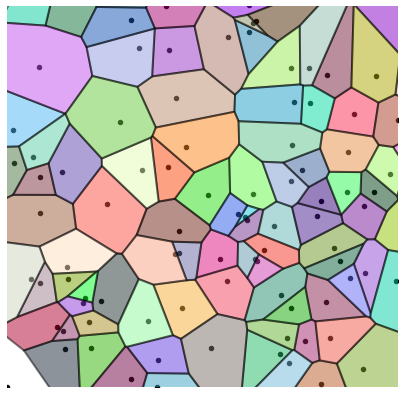

In [11]:
# number of points to generate
N = 100

# randomly generated sites
pts = np.random.rand(N,2) 

# add some anchor points on the corners.
anchors = np.array([[0,0],[0,1],[1,0],[1,1]]) 
pts = np.vstack([pts, anchors])

def voronoi_plot(pts):
    vor = Voronoi(pts) # create voronoi object
    x, y = pts[:,0], pts[:,1]
    regions, vertices = get_finite_polygons(vor) # some custom processing to more easily access polygons.

    # plot
    fig, ax = plt.subplots(1,1,figsize=(7,7))
    for region in regions:
        polygon = vertices[region]
        color = np.random.rand(3) # generate a random RGB triplet.
        plt.fill(polygon[:,0], polygon[:,1],
                 alpha=0.5, facecolor=color,
                 linewidth=2, edgecolor='k')
    plt.scatter(x, y, color='k', s=20) # plot the seeds
    plt.xlim(0.9*min(x),0.9*max(x)); plt.ylim(0.9*min(y),0.9*max(y))
    plt.axis('off')
    plt.show()

voronoi_plot(pts)

You can run the cell below to generate different random instances of the Voronoi tessellations, and vary the number of points.

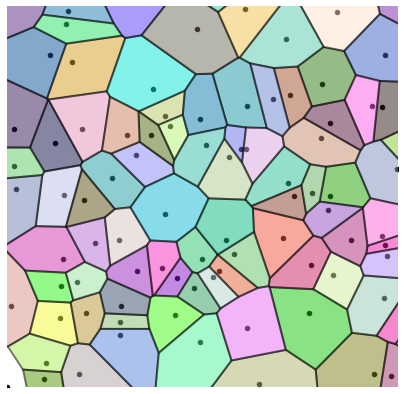

In [14]:
N = 100
pts = np.random.rand(N,2) 
anchors = np.array([[0,0],[0,1],[1,0],[1,1]]) 
pts = np.vstack([pts, anchors])
voronoi_plot(pts)

#### Fractal patterns as sites
Instead of randomly seeding the plane with sites, we can use sites that come from one our geometric fractals. Below, we use the fractal tree example from a previous lesson to output the segment endpoints, and use these as sites for our voronoi plot.

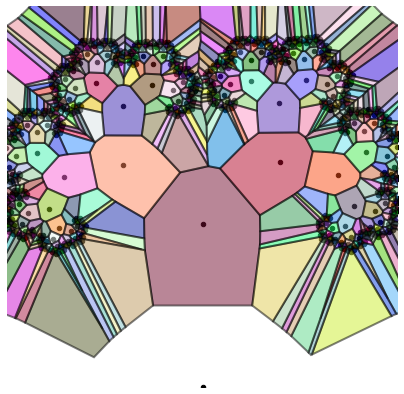

In [6]:
anchors = np.array([[-1.3,0],[1.3,0],[-1.3,2.6],[1.3,2.6]])
pts = make_fractal(fractal_tree, 10, np.pi/2)
pts = np.vstack([pts, anchors])

voronoi_plot(pts)

The above image is a little messy, so let's apply a few constraints:
1. We'd like to avoid coloring the long, narrow cells, and only keep the ones that really delineate our tree. We can filter the narrow cells out by only coloring cells whose site is near the cell centroid.
2. Instead of randomly assigning a color, we can make the color relate to cell area.

These two constraints are applied to our custom function ```cactus_plot``` which is in the ```voronoi_utils.py``` file. The fractal tree has some randomness to the angle along which new branches form, so rerunning the cell below will create some slight variations.

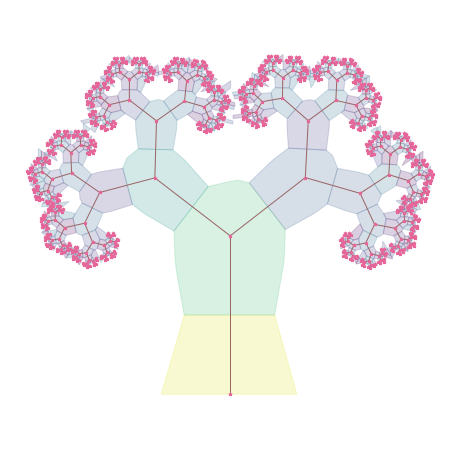

In [19]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
anchors = np.array([[-1.3,0],[1.3,0],[-1.3,2.6],[1.3,2.6]])
pts = make_fractal(fractal_tree, 10, np.pi/2, ax)
pts = np.vstack([pts, anchors])
cactus_plot(pts, ax, cmap=plt.cm.viridis) # you can change the cmap to any valid matplotlib colormap.
plt.show()

Let's repeat this process for the dragon curve:

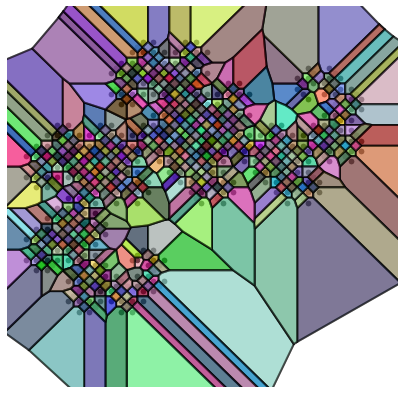

In [17]:
anchors = np.array([[-0.6,-0.6],[-0.6,1.2],[1.2,-0.6],[1.2,1.2]])
pts = make_fractal(dragon_curve, 12, np.pi/4)
pts = np.vstack([pts, anchors])

voronoi_plot(pts)

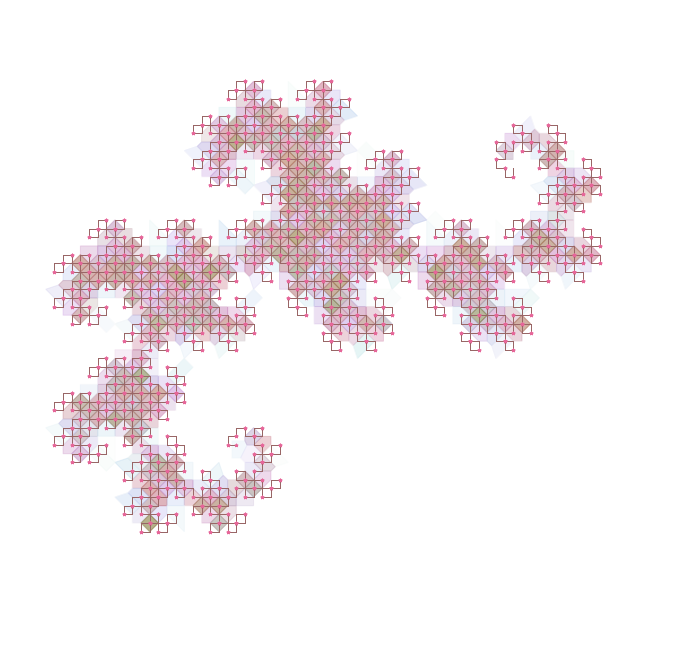

In [18]:
fig, ax = plt.subplots(1,1,figsize=(12,12))
anchors = np.array([[-0.5,-0.5],[-0.5,1.],[1.,-0.5],[1.,1.]])
pts = make_fractal(dragon_curve, 12, np.pi/4, ax)
pts = np.vstack([pts, anchors])
dragon_plot(pts, ax, cmap=plt.cm.cubehelix) # you can change the cmap to any valid matplotlib colormap.
plt.show()